In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\jain1a\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jain1a\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\jain1a\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\jain1a\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv("USA_cars_datasets.csv")

In [4]:
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [5]:
df.shape

(2499, 13)

## Step 1

In [3]:
## 1. Data Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


`Inferences`

* 12 features are available.  
* Unanmed 0 looks like a redundant id column  - drop
* Vin and Lot - seems to be a repetative ID  -- drop
* condition - Statement check for vehicle.  -- keep this for feature extraction 


* Must look for data type corrections. 

In [8]:
## Action 1 - Checking == Unnamed: 0
## Objective - Check if data is redundant

df['Unnamed: 0'].nunique() == df.shape[0]

## Drop the column. 

True

In [14]:
## Action 2 - Check vin & Lot

print(round((df['vin'].nunique()/df.shape[0])*100, 2))
print(round((df['lot'].nunique()/df.shape[0])*100, 2))

## Looks like they are also more or less an ID column - unique identifier. 
## Should check the left out 0.16% data --- Looks like a data entry problem 

99.84
99.84


In [25]:
df['vin'][2]

'  3c4pdcgg5jt346413'

In [15]:
df['vin'].value_counts()

#1gnevhkw8jj148388
#1gndt13s632267445
#3gcrkse37ag234620
#1g1al58f787159241

  1gnevhkw8jj148388    2
  1gndt13s632267445    2
  3gcrkse37ag234620    2
  1g1al58f787159241    2
  1fm5k8gt7kgb48943    1
                      ..
  2c3cdxbg5eh300547    1
  2c4rdgcg8jr208468    1
  3c4pdcab8ht507652    1
  3c4pdcgb7ht525941    1
  3n1cn7ap4jl884311    1
Name: vin, Length: 2495, dtype: int64

In [26]:
df[df['vin'] == '  1gnevhkw8jj148388']

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
336,336,26900,chevrolet,traverse,2018,clean vehicle,42941.0,black,1gnevhkw8jj148388,167781794,missouri,usa,20 hours left
661,661,26900,chevrolet,traverse,2018,clean vehicle,42941.0,black,1gnevhkw8jj148388,167781794,missouri,usa,19 hours left


` Drop 3 columns`

In [29]:
df = df.drop(['Unnamed: 0','vin','lot'], axis =1)

In [30]:
df.head()

,price,brand,model,year,title_status,mileage,color,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa,22 hours left


## Step 2

In [34]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [35]:
## Data describe 

df.describe()

,price,year,mileage
count,2499.000,2499.000,2499.000
mean,18767.671,2016.714,52298.685
std,12116.095,3.443,59705.516
min,0.000,1973.000,0.000
25%,10200.000,2016.000,21466.500
50%,16900.000,2018.000,35365.000
75%,25555.500,2019.000,63472.500
max,84900.000,2020.000,1017936.000


`Inferences`

* Year inferences does not make sense. Still would keep it / use this as category
* Price max seems bit off from std -- Looks a mild potential outlier. 
* Mileage - max looks way off than 75th percentile. - Potential strong outlier.  - Outlier treatment 

In [ ]:
## Actions for outlier treatment are pending. Do it after plots. 

## Step 3 



In [ ]:
## Missing values 

In [38]:
df.isnull().sum()

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
state           0
country         0
condition       0
dtype: int64

`Inference`
* No missing value

## Step 4

In [39]:
## Univariate Analysis 

In [41]:
needed_cols = ['price', 'mileage']

C:\Users\jain1a\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

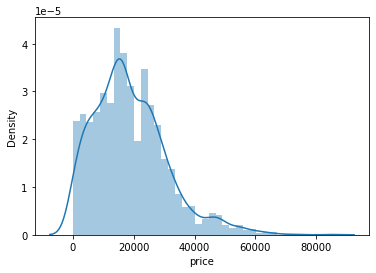

In [42]:
sns.distplot(df[needed_cols[0]])

C:\Users\jain1a\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mileage', ylabel='Density'>

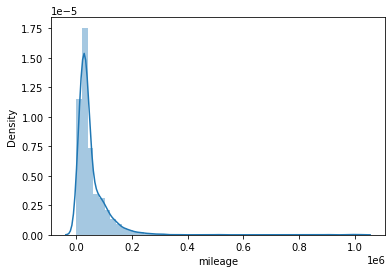

In [43]:
sns.distplot(df[needed_cols[1]])

`Inference`
* Replicated the same info from describe ()

In [44]:
## Action 3 -- Remove outliers

## Implement Box plot logic 

## Implement static quantiles (95, 99 // 0.05, 0.01)

In [45]:
u_th = df['mileage'].quantile(0.99)
l_th = df['mileage'].quantile(0.01)


uth_bp = TODO
lth_bp = TODO

In [48]:
df_filtered = df[(df['mileage'] < u_th) & (df['mileage'] > l_th)]

In [49]:
print(df.shape)
print(df_filtered.shape)

(2499, 10)
(2449, 10)


In [ ]:
## Information loss = 50 rows  - 2%

In [ ]:
## Step 3a
Feature Extraction -- Convert 'condition' into usable format. 

## Step 4

In [ ]:
## Bi Variate Analysis. 

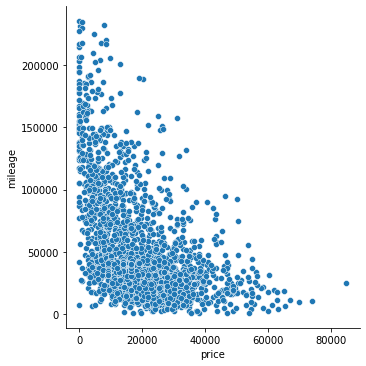

In [53]:
# a. Num to num 

## brand wise price
sns.relplot(data = df_filtered, x='price', y ='mileage')

df.columns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'ford'),
  Text(1, 0, 'dodge'),
  Text(2, 0, 'chevrolet'),
  Text(3, 0, 'gmc'),
  Text(4, 0, 'chrysler'),
  Text(5, 0, 'kia'),
  Text(6, 0, 'buick'),
  Text(7, 0, 'infiniti'),
  Text(8, 0, 'mercedes-benz'),
  Text(9, 0, 'jeep'),
  Text(10, 0, 'bmw'),
  Text(11, 0, 'cadillac'),
  Text(12, 0, 'hyundai'),
  Text(13, 0, 'mazda'),
  Text(14, 0, 'honda'),
  Text(15, 0, 'jaguar'),
  Text(16, 0, 'acura'),
  Text(17, 0, 'harley-davidson'),
  Text(18, 0, 'audi'),
  Text(19, 0, 'lincoln'),
  Text(20, 0, 'lexus'),
  Text(21, 0, 'nissan'),
  Text(22, 0, 'land'),
  Text(23, 0, 'maserati'),
  Text(24, 0, 'ram')])

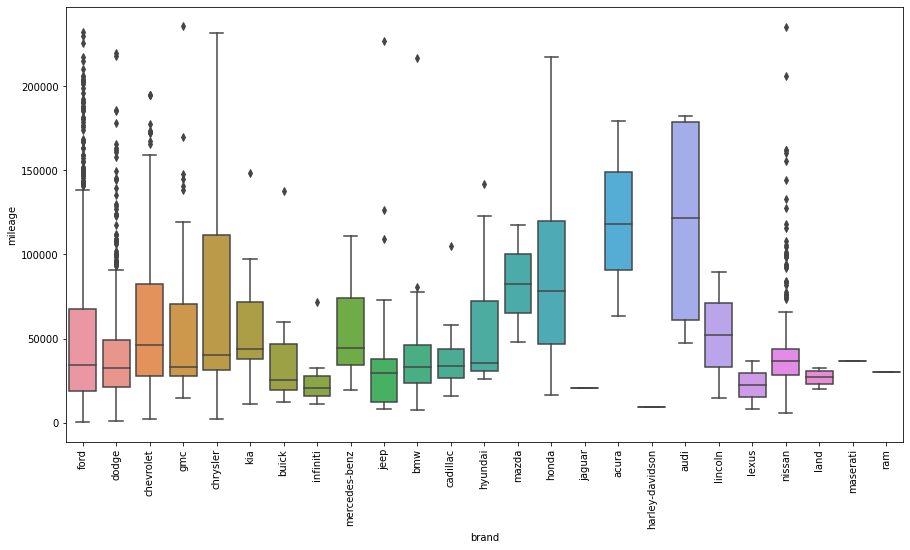

In [58]:
# Cat to num
## brand wise mileage
plt.figure(figsize=(15,8))
sns.boxplot(data = df_filtered, x = 'brand', y = 'mileage')
plt.xticks(rotation = 90)

In [60]:
df.columns

Index(['price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color',
       'state', 'country', 'condition'],
      dtype='object')

(array([0, 1]), [Text(0, 0, 'clean vehicle'), Text(1, 0, 'salvage insurance')])

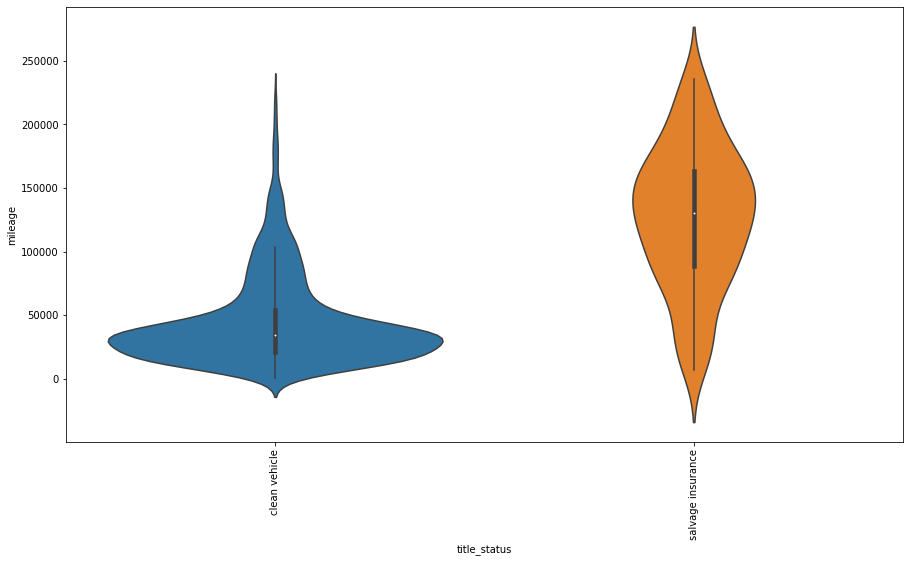

In [61]:
plt.figure(figsize=(15,8))
sns.violinplot(data = df_filtered, x = 'title_status', y = 'mileage')
plt.xticks(rotation = 90)

In [63]:
df_filtered['color'].value_counts()

white                                      699
black                                      506
gray                                       389
silver                                     295
red                                        188
blue                                       148
no_color                                    60
green                                       21
orange                                      20
charcoal                                    18
gold                                        16
brown                                       13
yellow                                       8
magnetic metallic                            6
beige                                        5
shadow black                                 5
ingot silver metallic                        4
oxford white                                 4
triple yellow tri-coat                       3
color:                                       3
billet silver metallic clearcoat             3
super black  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, 'silver'),
  Text(1, 0, 'blue'),
  Text(2, 0, 'red'),
  Text(3, 0, 'white'),
  Text(4, 0, 'black'),
  Text(5, 0, 'gray'),
  Text(6, 0, 'orange'),
  Text(7, 0, 'brown'),
  Text(8, 0, 'no_color'),
  Text(9, 0, 'gold'),
  Text(10, 0, 'charcoal'),
  Text(11, 0, 'turquoise'),
  Text(12, 0, 'beige'),
  Text(13, 0, 'green'),
  Text(14, 0, 'dark blue'),
  Text(15, 0, 'phantom black'),
  Text(16, 0, 'yellow'),
  Text(17, 0, 'toreador red'),
  Text(18, 0, 'bright white clearcoat'),
  Text(19, 0, 'billet silver metallic clearcoat'),
  Text(20, 0, 'black clearcoat'),
  Text(21, 0, 'jazz blue pearlcoat'),
  Text(22, 0, 'purple'),
  Text(23, 0, 'ruby red metallic tinted clearcoat'),
  Text(24, 0, 'triple yellow tri-coat'),
  Text(25, 0, 'competition orange'),
  Text(26, 0, 'of

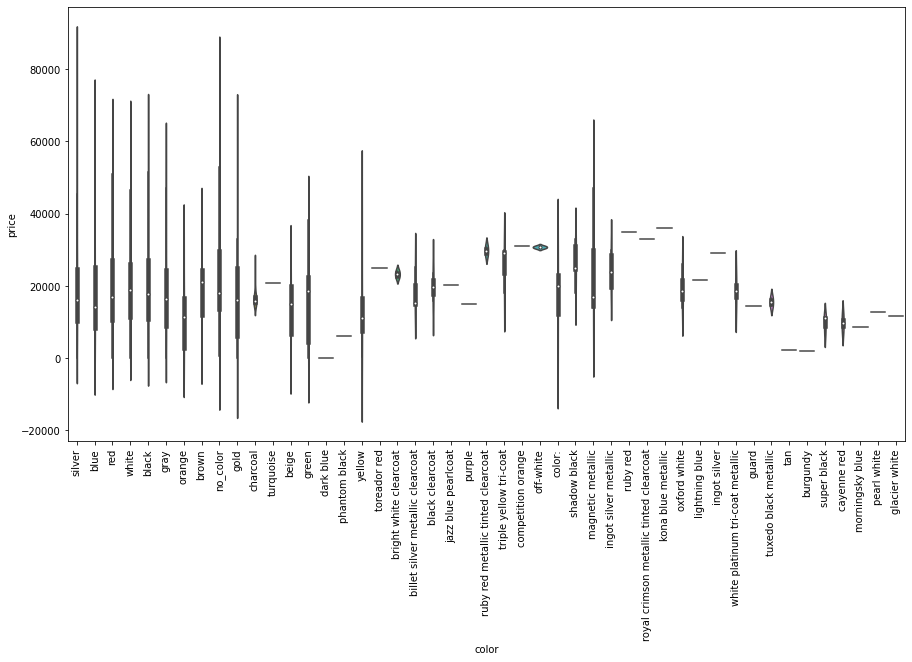

In [62]:
plt.figure(figsize=(15,8))
sns.violinplot(data = df_filtered, x = 'color', y = 'price')
plt.xticks(rotation = 90)

In [ ]:
df_filtered['color']

C:\Users\jain1a\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, 'silver'),
  Text(1, 0, 'blue'),
  Text(2, 0, 'red'),
  Text(3, 0, 'white'),
  Text(4, 0, 'black'),
  Text(5, 0, 'gray'),
  Text(6, 0, 'orange'),
  Text(7, 0, 'brown'),
  Text(8, 0, 'no_color'),
  Text(9, 0, 'gold'),
  Text(10, 0, 'charcoal'),
  Text(11, 0, 'turquoise'),
  Text(12, 0, 'beige'),
  Text(13, 0, 'green'),
  Text(14, 0, 'dark blue'),
  Text(15, 0, 'phantom black'),
  Text(16, 0, 'yellow'),
  Text(17, 0, 'toreador red'),
  Text(18, 0, 'bright white clearcoat'),
  Text(19, 0, 'billet silver metallic clearcoat'),
  Text(20, 0, 'black clearcoat'),
  Text(21, 0, 'jazz blue pearlcoat'),
  Text(22, 0, 'purple'),
  Text(23, 0, 'ruby red metallic tinted clearcoat'),
  Text(24, 0, 'triple yellow tri-coat'),
  Text(25, 0, 'competition orange'),
  Text(26, 0, 'of

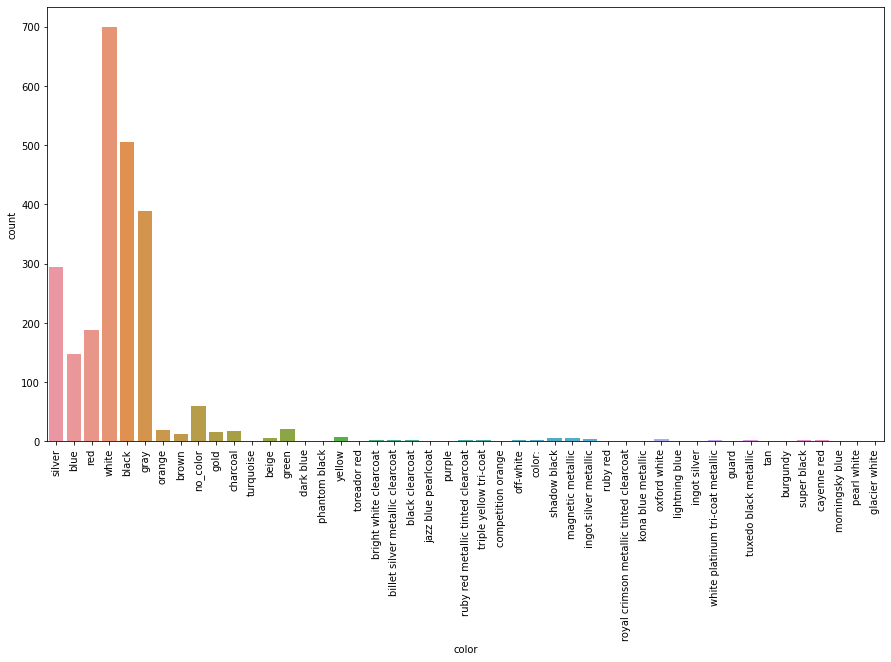

In [65]:
plt.figure(figsize=(15,8))
sns.countplot(df_filtered['color'])
plt.xticks(rotation = 90)

In [ ]:
df.head()

## Q1. Top 5 Car brands in terms of number of cars

<AxesSubplot:>

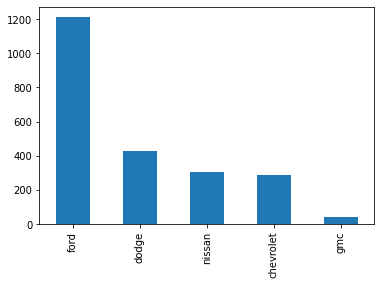

In [70]:
df_filtered['brand'].value_counts().head().plot.bar()

<AxesSubplot:xlabel='brand'>

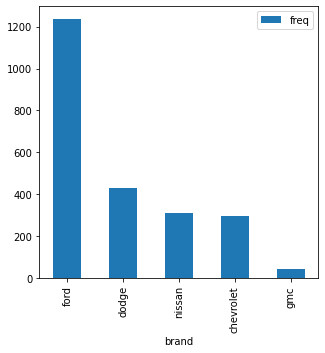

In [66]:
data = []

for brand in df['brand'].unique():
    data.append([brand , len(df[df['brand']  == brand])])

pd.DataFrame(data,columns = ['brand','freq']).sort_values(by='freq', ascending=False).head().plot(x = 'brand', y = 'freq', kind = 'bar', figsize = (5,5))

## 2.Car brand based on Frequency of Cars

<AxesSubplot:xlabel='brand'>

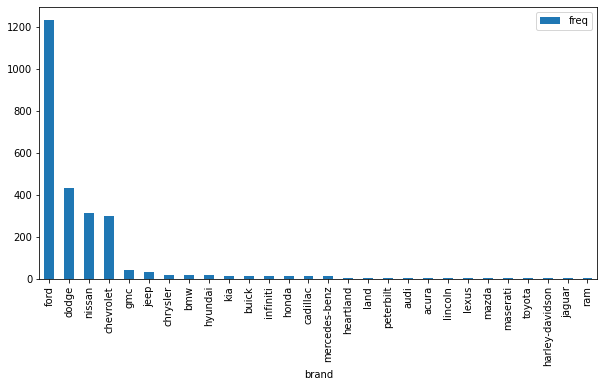

In [71]:
data = []

for brand in df['brand'].unique():
    data.append([brand , len(df[df['brand']  == brand])])

pd.DataFrame(data,columns = ['brand','freq']).sort_values(by='freq', ascending=False).plot(x = 'brand', y = 'freq', kind = 'bar', figsize = (10,5))

## 3. Car Industry Trend

<AxesSubplot:>

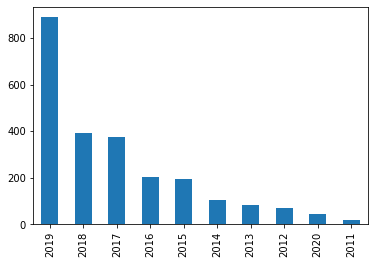

In [73]:
df_filtered['year'].value_counts().head(10).plot.bar()

In [ ]:
data = []

for year in df['year'].unique():
    data.append([year , len(df[df['year']  == year])])

pd.DataFrame(data,columns = ['year','freq']).sort_values(by='year', ascending = True).plot(x = 'year', y = 'freq', kind = 'line', figsize = (5,5))

## 4. Most Populat Car Colours

<AxesSubplot:xlabel='color'>

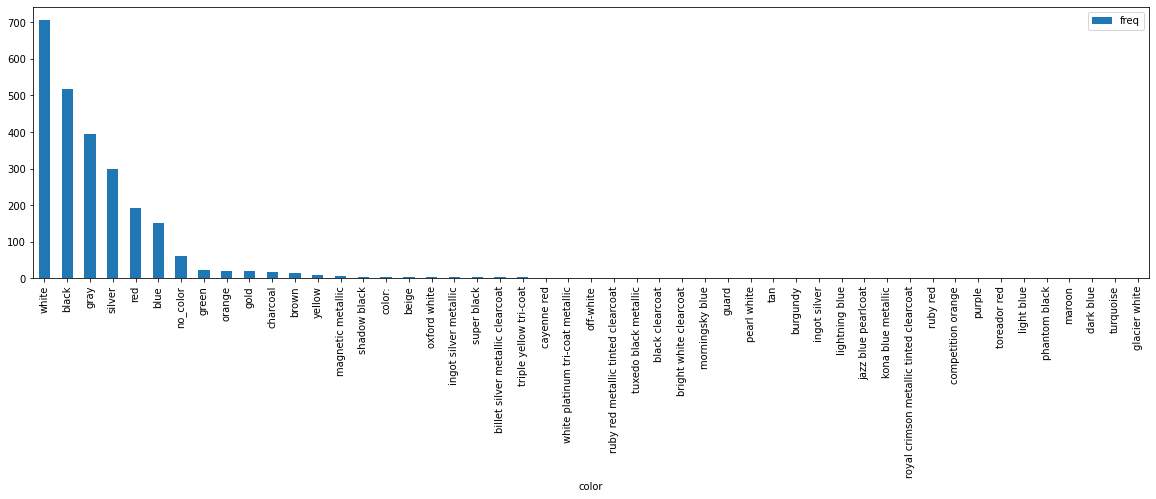

In [74]:
data = []

for color in df['color'].unique():
    data.append([color , len(df[df['color']  == color])])

pd.DataFrame(data,columns = ['color','freq']).sort_values(by='freq', ascending=False).plot(x = 'color', y = 'freq', kind = 'bar', figsize = (20,5))

## Q5. Which car brand is having Maximum Average Price

<AxesSubplot:xlabel='brand'>

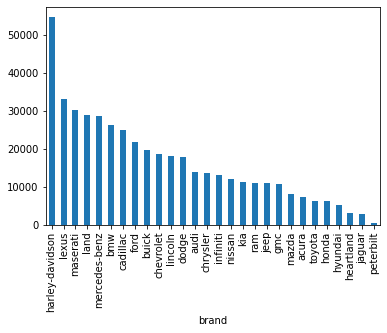

In [75]:
df.groupby('brand').mean()['price'].sort_values(ascending = False).plot.bar()

# Q6. Which State is having most expensive cars

<AxesSubplot:xlabel='state'>

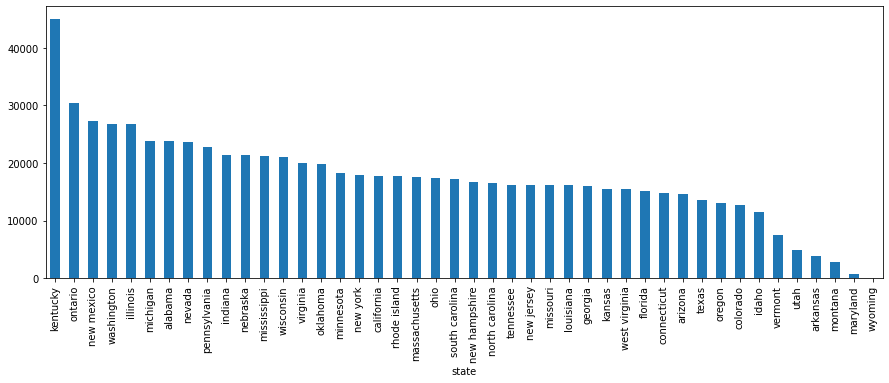

In [76]:
df.groupby('state').mean()['price'].sort_values(ascending = False).plot.bar(figsize = (15,5))

<AxesSubplot:xlabel='year'>

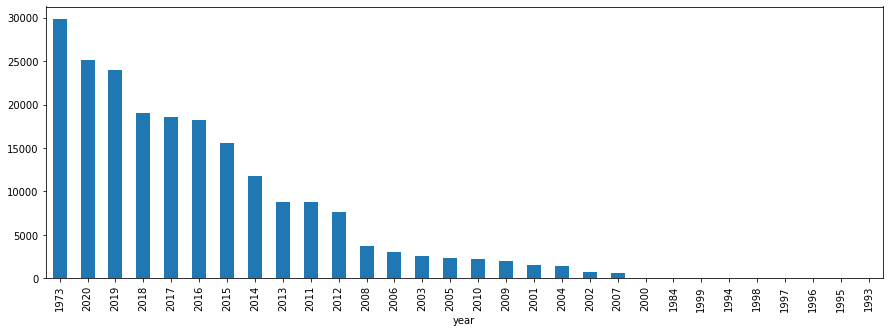

In [77]:
df.groupby('year').mean()['price'].sort_values(ascending = False).plot.bar(figsize = (15,5))

In [79]:
df_filtered[df_filtered['year'] == 1973]

,price,brand,model,year,title_status,mileage,color,state,country,condition
32,29800,chevrolet,camaro,1973,clean vehicle,46226.000,red,pennsylvania,usa,22 hours left
